___
# Analyzing Outliers
## Analyzing extreme values with univariate methods.
___

In [2]:
import pandas as pd    
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from matplotlib import rcParams
from sklearn import datasets

%matplotlib inline
rcParams['figure.figsize'] = 7.5, 6

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns= iris.feature_names)

### Using boxplots to identify outliers

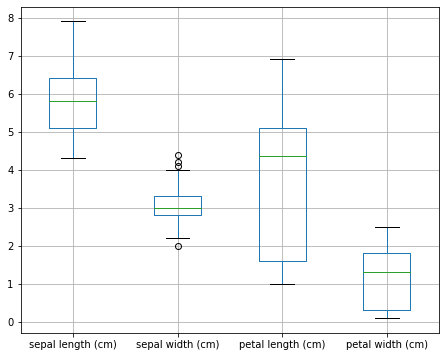

In [3]:
df.boxplot()
plt.show()

In [4]:
width_sepal = df['sepal width (cm)']
iris_outliers = (width_sepal > 4)
df[iris_outliers]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
15,5.7,4.4,1.5,0.4
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2


In [5]:
iris_outliers = (width_sepal < 2.05)
df[iris_outliers]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
60,5.0,2.0,3.5,1.0


### Applying tukey's method for identifying outliers

In [12]:
pd.options.display.float_format = '{:.2f}'.format
X_df = pd.DataFrame(df['sepal width (cm)'])
summary = X_df.describe()
print(summary)

       sepal width (cm)
count            150.00
mean               3.06
std                0.44
min                2.00
25%                2.80
50%                3.00
75%                3.30
max                4.40


In [ ]:
#### Calculating inf and sup limits beteen quartiles

In [13]:
q1 = summary.loc['75%'] - summary.loc['25%']
q1

sepal width (cm)   0.50
dtype: float64

In [14]:
inf_limit = summary.loc['25%'] - q1*1.5
inf_limit

sepal width (cm)   2.05
dtype: float64

In [15]:
sup_limit = summary.loc['75%'] + q1*1.5
sup_limit

sepal width (cm)   4.05
dtype: float64